# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


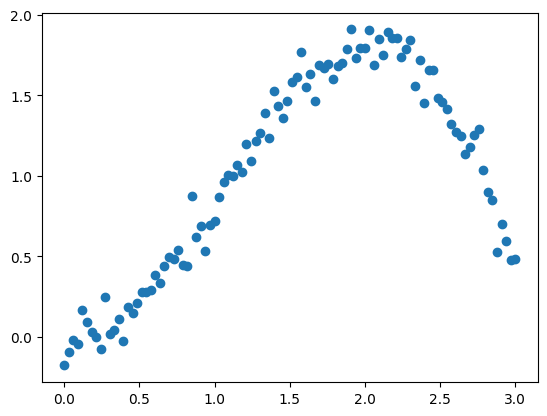

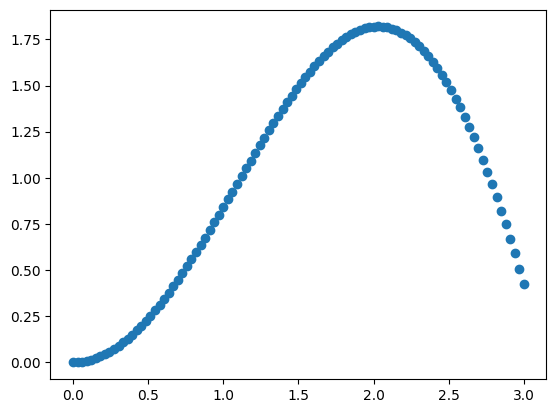

In [3]:
mean = 0
variance = 0.1
SD = variance**0.5
N = 100

x = np.linspace(0, 3, N)
E = np.random.normal(mean, 0.1, N)
y_clean = x*np.sin(x)
y_noisy = x*np.sin(x) + E
plt.scatter(x, y_noisy)
plt.show()
plt.scatter(x, y_clean)
plt.show()

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


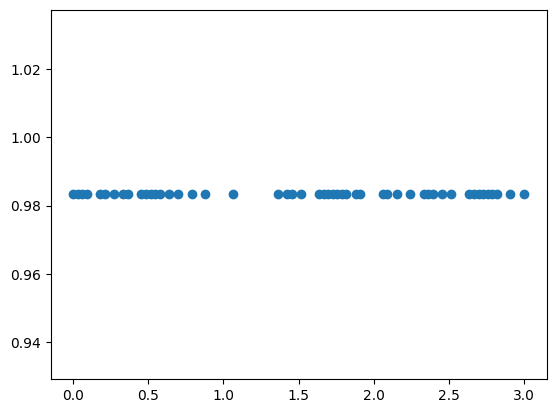

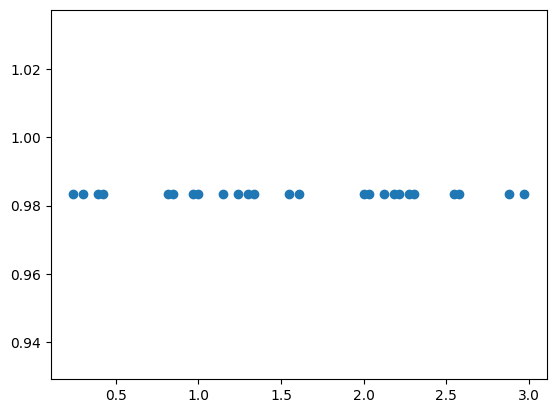

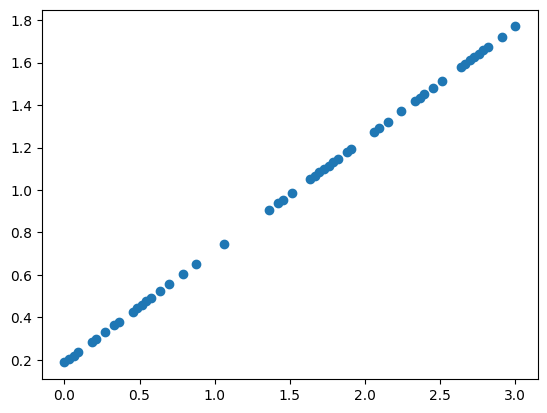

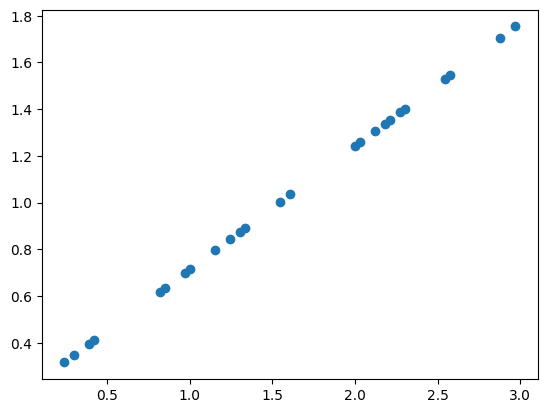

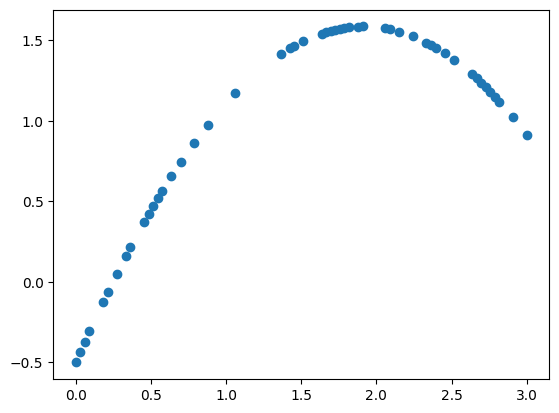

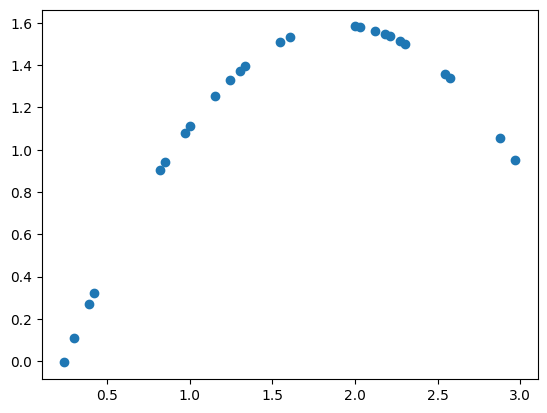

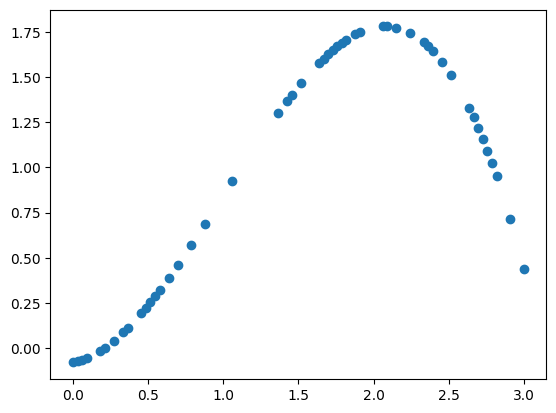

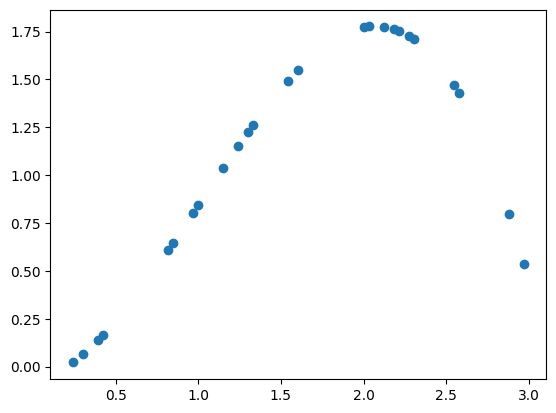

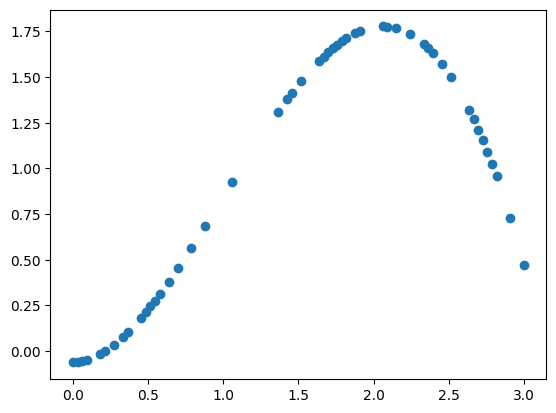

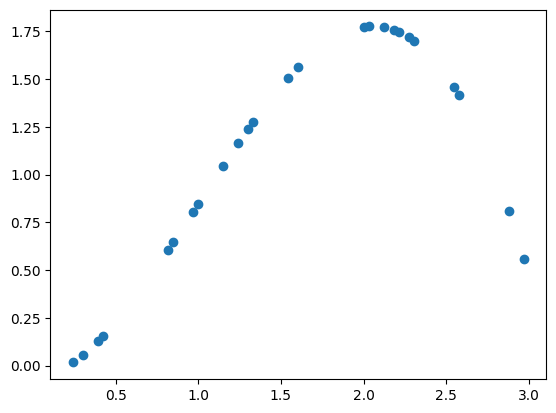

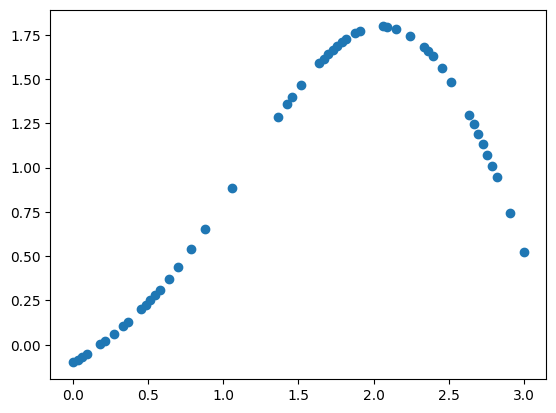

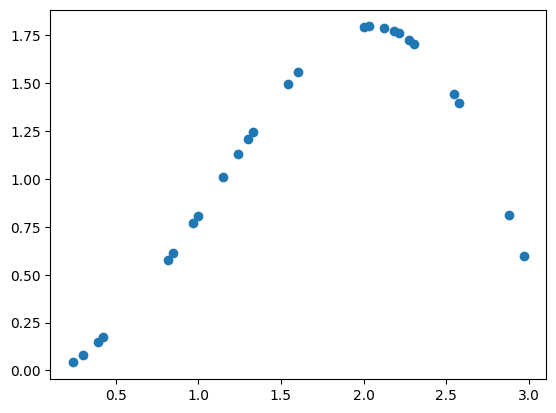

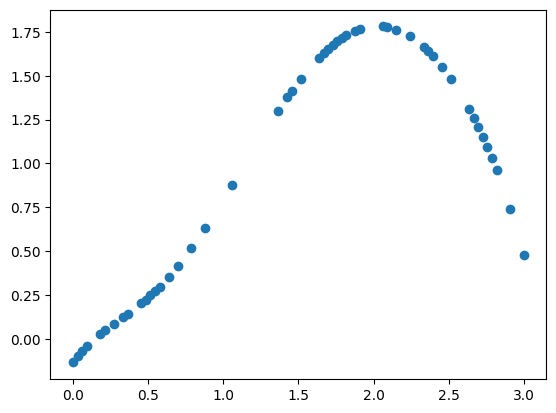

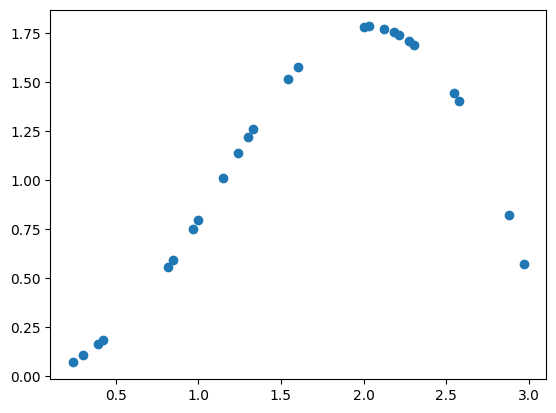

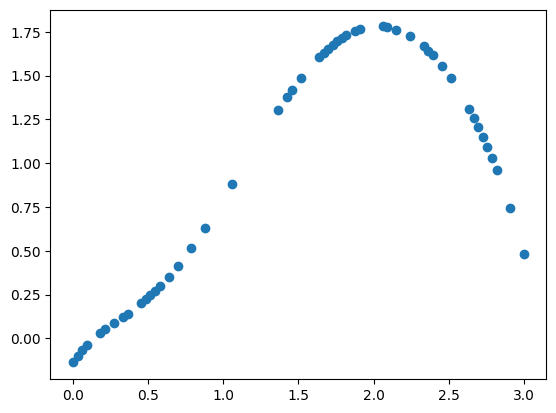

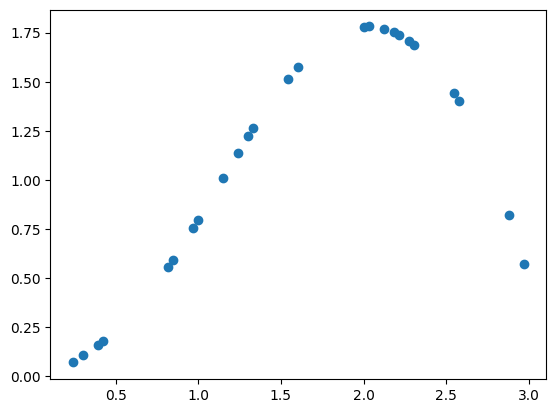

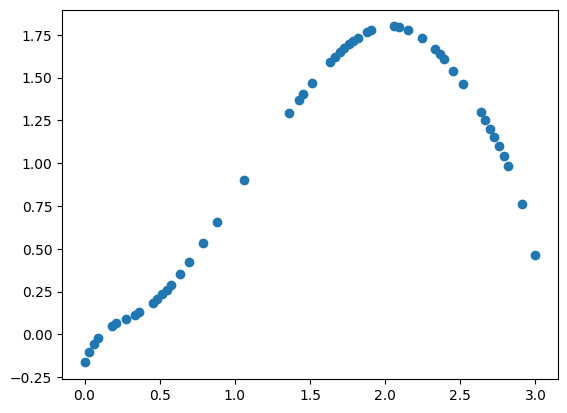

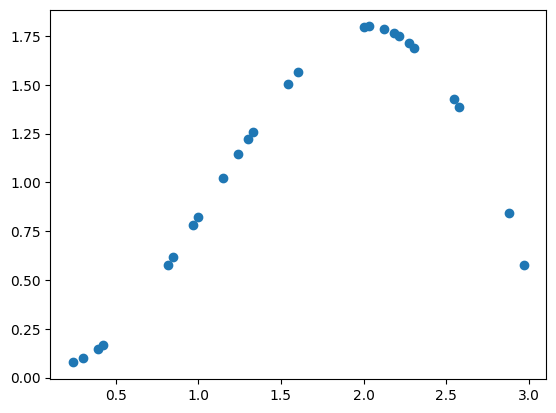

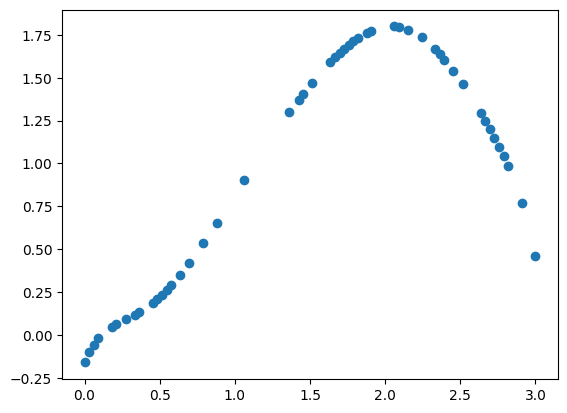

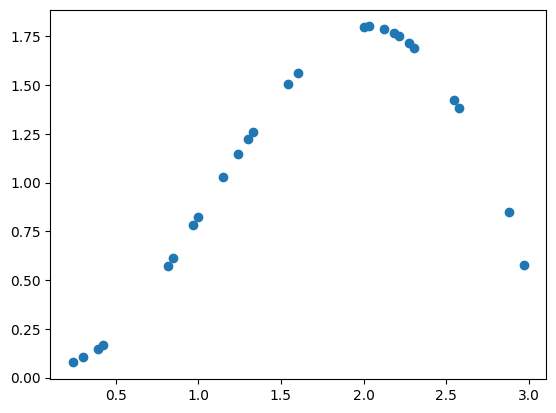

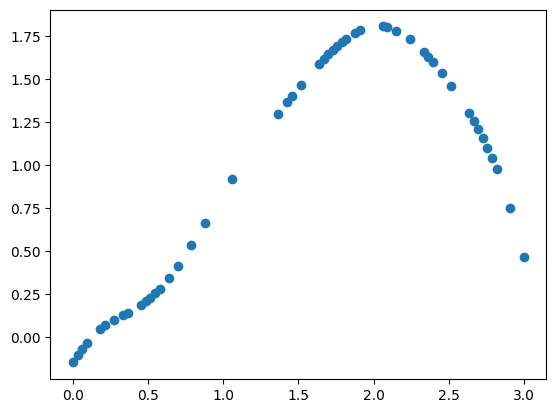

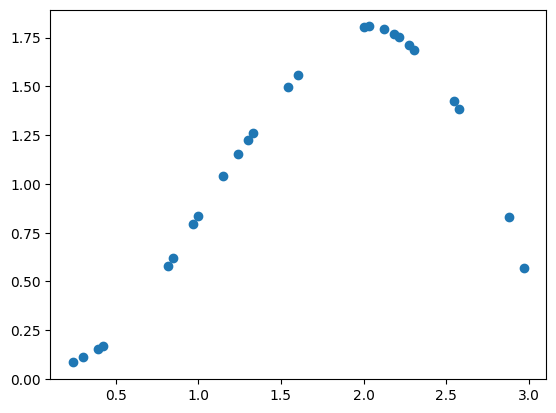

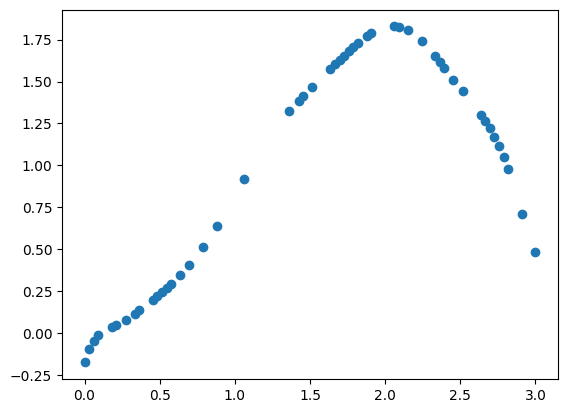

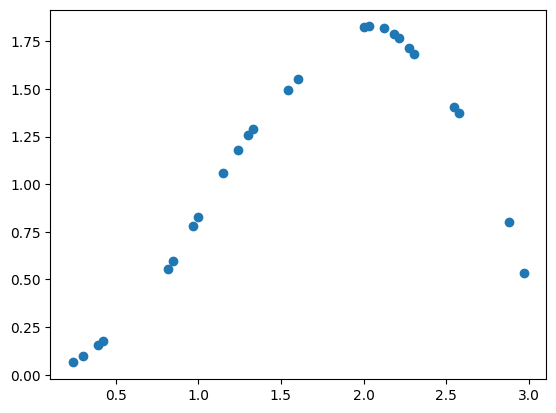

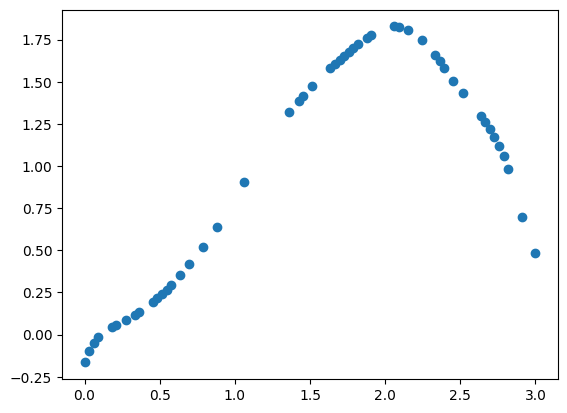

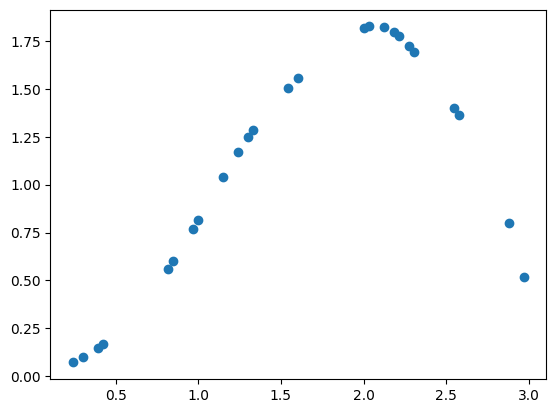

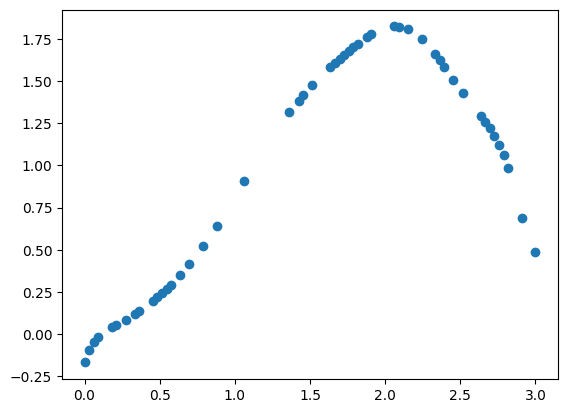

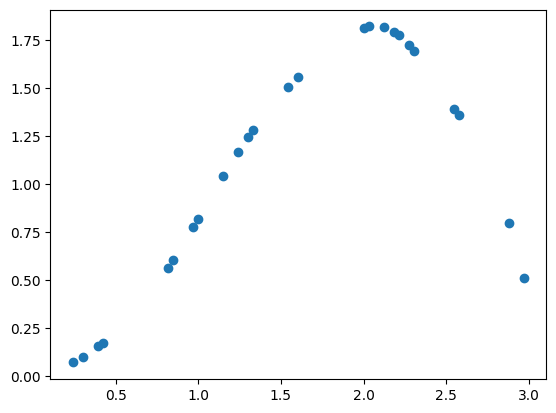

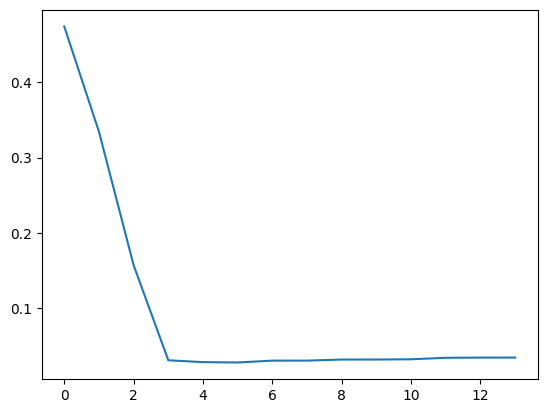

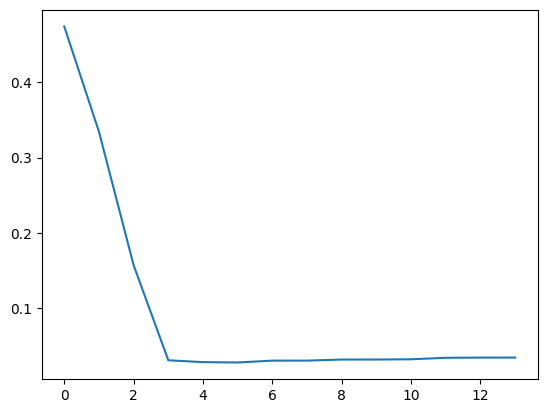

In [34]:
from sklearn.model_selection import train_test_split

deg = np.arange(0, 15)

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, train_size = 0.5, test_size = 0.5)
x_test, x_cross, y_test, y_cross = train_test_split(x_test, y_test, train_size = 0.5, test_size = 0.5)
MSE = np.zeros((14, 50))
RMSE_train = np.zeros(14)
RMSE_cross = np.zeros(14)
for n in range(14):
  best_fit_coeff = np.polyfit(x_train, y_train, deg[n])
  best_fit = np.poly1d(best_fit_coeff)
  plt.scatter(x_train, best_fit(x_train))
  plt.show()
  MSE[n,:] = ((best_fit(x_train) - x_train*np.sin(x_train))**2)/N
  RMSE_train[n] = np.sum(MSE[n,:])
  plt.scatter(x_cross, best_fit(x_cross))
  plt.show()
  MSE[n,:] = ((best_fit(x_train) - x_train*np.sin(x_train))**2)/N
  RMSE_cross[n] = np.sum(MSE[n,:])

RMSE_train = RMSE_train**0.5
RMSE_cross = RMSE_cross**0.5

plt.plot(RMSE_train)
plt.show()
plt.plot(RMSE_cross)
plt.show()